Importing modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Reading CSV File

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data file.csv', index_col=[0])
df.drop(['pcircle','pdate'], axis=1, inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [3]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [11]:
df.drop('msisdn',axis=1, inplace=True)

As we can see in the dataframe, the column msisdn contains a character in between. So we will remove it. Beacause msisdn column has no role in training the model.

Chechking for Outliers

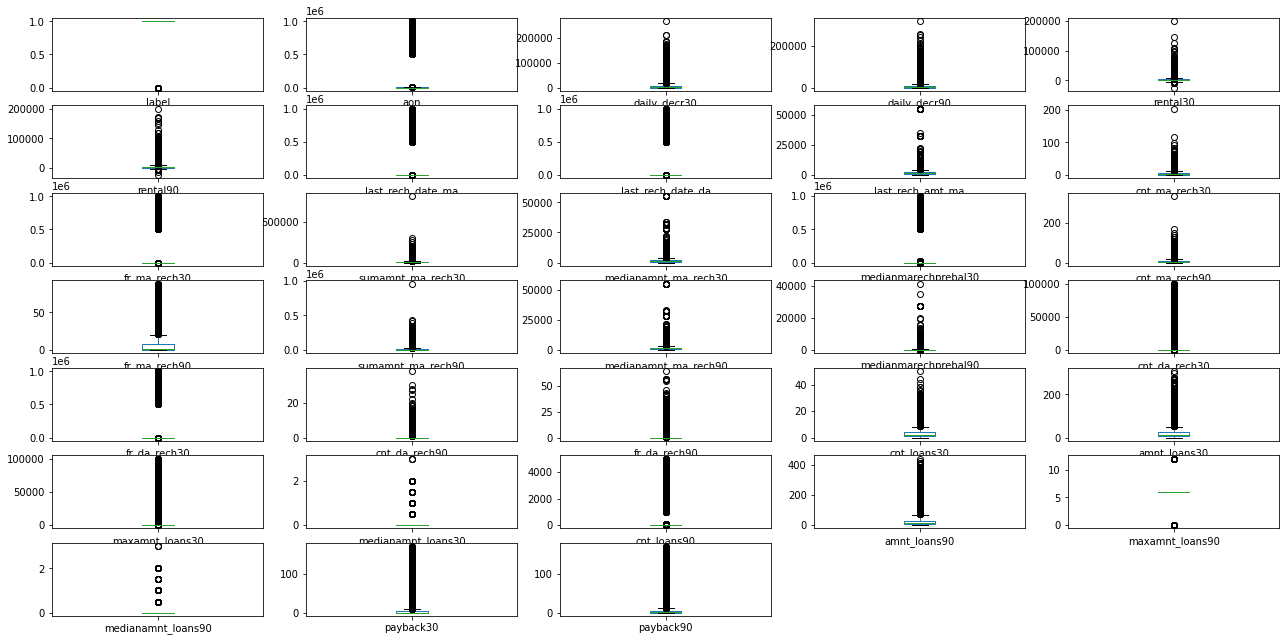

In [20]:
df.plot(kind='box', subplots=True, layout=(7,5), sharex=False, legend=False, figsize=(22,11))
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

label                       0.000
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans9

Replacing outliers with 10th percentile and 90th percentile

In [ ]:
import numpy as np
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.10,0.90]).values
            df[col] = np.where(df[col] <percentiles[0], percentiles[0],df[col])
            df[col] = np.where(df[col] >percentiles[1], percentiles[1],df[col])
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  label
capping the  aon
capping the  daily_decr30
capping the  daily_decr90
capping the  rental30
capping the  rental90
capping the  last_rech_date_ma
capping the  last_rech_date_da
capping the  last_rech_amt_ma
capping the  cnt_ma_rech30
capping the  fr_ma_rech30
capping the  sumamnt_ma_rech30
capping the  medianamnt_ma_rech30
capping the  medianmarechprebal30
capping the  cnt_ma_rech90
capping the  fr_ma_rech90
capping the  sumamnt_ma_rech90
capping the  medianamnt_ma_rech90
capping the  medianmarechprebal90
capping the  cnt_da_rech30
capping the  fr_da_rech30
capping the  cnt_da_rech90
capping the  fr_da_rech90
capping the  cnt_loans30
capping the  amnt_loans30
capping the  maxamnt_loans30
capping the  medianamnt_loans30
capping the  cnt_loans90
capping the  amnt_loans90
capping the  maxamnt_loans90
capping the  medianamnt_loans90
capping the  payback30
capping the  payback90


Checking the skewness of each column

In [ ]:
df_column = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in df_column:
  print(df[i].skew())

0.5299969187309155
1.087036354612934
1.1481764564680965
1.1218603060810146
1.1514188033021657
1.0800142612413433
0
0.832098047373243
0.6330879782060913
1.007565244213573
0.76074114926957
0.9268587793726206
1.3625353103439388
0.837199284511482
1.5858517112511397
0.8606145605752538
1.054409311837928
1.2642534565538623
0
0
0
0
0.9044050963546795
0.79499127130904
2.206134906678474
0
1.0302601932714728
0.9690530667894938
2.241298556976001
0
1.0035857696322759
1.0256362577476463


In [ ]:
x = final_df.drop('label', axis=1)

In [ ]:
y = final_df['label'] 

Checking our data is balance or not.

Counter({1.0: 183431, 0.0: 26162})


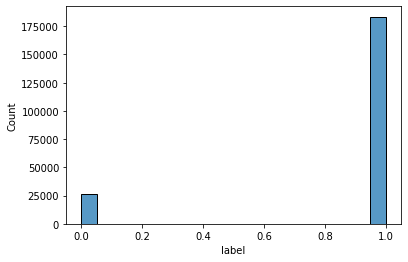

In [ ]:
sns.histplot(y)
print(Counter(y))

Now we have to balance our data.

In [ ]:
ros = RandomOverSampler(random_state=63)
x_ros, y_ros = ros.fit_resample(x, y)
print('Original dataset shape:',Counter(y))
print('Resamplr dataset shape:',Counter(y_ros))

Original dataset shape: Counter({1.0: 183431, 0.0: 26162})
Resamplr dataset shape: Counter({0.0: 183431, 1.0: 183431})


Finding best random state

In [ ]:
maxAccu = 0
maxRS = 0

for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.7530324644054552 on Random State:  13


Creating train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=13)

Training Models

In [ ]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred)*100)
print('Confusion Matrix', confusion_matrix(y_test, pred))
print('Classification Report', classification_report(y_test, pred))
print('f1 Score:', f1_score(y_test, pred))

Accuracy Score: 75.30324644054552
Confusion Matrix [[41883 13126]
 [14055 40995]]
Classification Report               precision    recall  f1-score   support

         0.0       0.75      0.76      0.76     55009
         1.0       0.76      0.74      0.75     55050

    accuracy                           0.75    110059
   macro avg       0.75      0.75      0.75    110059
weighted avg       0.75      0.75      0.75    110059

f1 Score: 0.7510236234897546


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred)*100)
print('Confusion Matrix',confusion_matrix(y_test, pred))
print('Classification Report',classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

Accuracy Score: 94.36756648706603
Confusion Matrix [[54850   159]
 [ 6040 49010]]
Classification Report               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     55009
         1.0       1.00      0.89      0.94     55050

    accuracy                           0.94    110059
   macro avg       0.95      0.94      0.94    110059
weighted avg       0.95      0.94      0.94    110059

f1 Score: 94.0519483011735


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred)*100)
print('Confusion Matrix',confusion_matrix(y_test, pred))
print('Classification Report',classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

Accuracy Score: 96.60636567659165
Confusion Matrix [[54856   153]
 [ 3582 51468]]
Classification Report               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     55009
         1.0       1.00      0.93      0.96     55050

    accuracy                           0.97    110059
   macro avg       0.97      0.97      0.97    110059
weighted avg       0.97      0.97      0.97    110059

f1 Score: 96.49857974519786


In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred)*100)
print('Confusion Matrix',confusion_matrix(y_test, pred))
print('Classification Report',classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

Accuracy Score: 73.49330813472774
Confusion Matrix [[47078  7931]
 [21242 33808]]
Classification Report               precision    recall  f1-score   support

         0.0       0.69      0.86      0.76     55009
         1.0       0.81      0.61      0.70     55050

    accuracy                           0.73    110059
   macro avg       0.75      0.73      0.73    110059
weighted avg       0.75      0.73      0.73    110059

f1 Score: 69.85917821240017


We are getting highest f1_score with Random Forest Classifier(94%) but it can be due overfitting also so we will check cross validation scores.

In [ ]:
scr = cross_val_score(lg, x_ros, y_ros, cv=5)
print('Cross validation score for Logistic Regression:', scr.mean()*100)

Cross validation score for Logistic Regression: 74.36229434184742


In [ ]:
scr = cross_val_score(dtc, x_ros, y_ros, cv=5)
print('Cross validation score for decision tree: ',scr.mean()*100)

Cross validation score for decision tree:  94.96404621419488


In [ ]:
scr = cross_val_score(rfc, x_ros, y_ros, cv=5)
print('Cross validation score for Random Forest:', scr.mean()*100)

Cross validation score for Random Forest: 97.05284271805859


In [ ]:
scr = cross_val_score(gnb, x_ros, y_ros, cv=5)
print('Cross validation score for XGBClassifier:', scr.mean()*100)

Cross validation score for XGBClassifier: 73.42679297726498


From above model prediction, we can see that the difference between f1_score and cross validation score is least for Random Forest Classifier. So now we perfrom the hyperparameter tuning for Random Forest Classifier.

Hyperparameter tuning for random forest

In [ ]:
parameters = {'max_depth': np.arange(2, 15),
              'criterion': ['gini', 'entropy']}

In [ ]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [ ]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [ ]:
mod = RandomForestClassifier(criterion='gini', max_depth=14, random_state=63)
mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print('f1 Score:', f1_score(y_test, pred)*100)

f1 Score: 88.57282797076331


Plotting ROCAUC Curve of the model

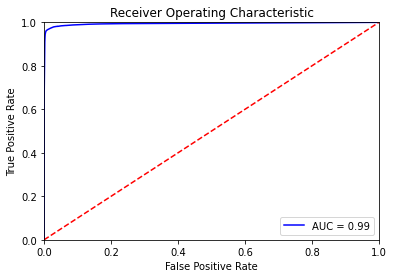

In [ ]:

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()